# CAR PRICE PREDICTION MODELS

**Problem Description:**

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal:**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [11]:
from sklearn.svm import SVR

In [13]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn.feature_selection import SelectKBest,f_regression,RFE

In [21]:
import joblib

## LOADING AND PREPROCESSING

In [23]:
dataf = pd.read_csv('Downloads/CarPrice_Assignment.csv')
data = pd.DataFrame(dataf)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
data.shape

(205, 26)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
data.duplicated().sum().sum()

0

In [15]:
data.isnull().sum().sum()

0

In [25]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
num_data = data.select_dtypes(include=['int64', 'float64'])

skewness = num_data.skew()
kurtosis = num_data.kurt()

In [31]:
print(f"Skewness:\n {skewness}")

Skewness:
 car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64


In [37]:
print(f"Kurtosis:\n {kurtosis}")

Kurtosis:
 car_ID             -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64


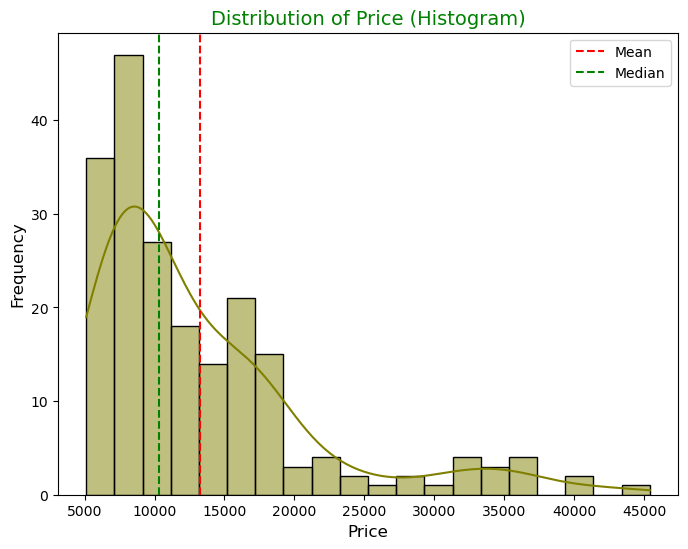

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, bins=20, color='olive')
plt.title('Distribution of Price (Histogram)', fontsize=14,color='green')
plt.axvline(data['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['price'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [29]:
correlation_matrix = num_data.corr()

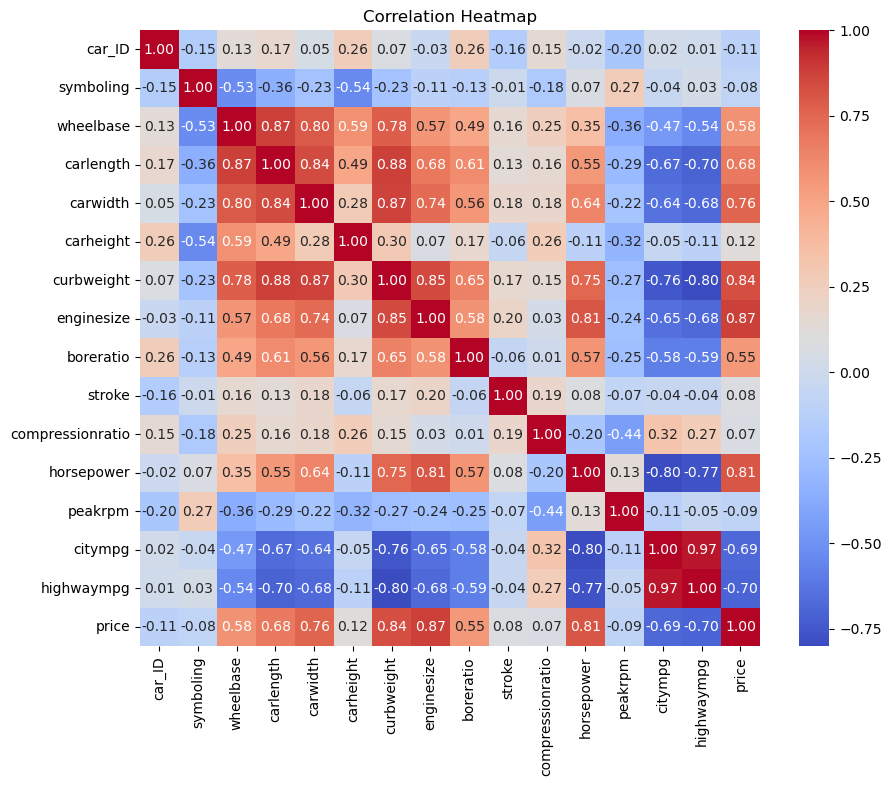

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Outlier Detection

In [31]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


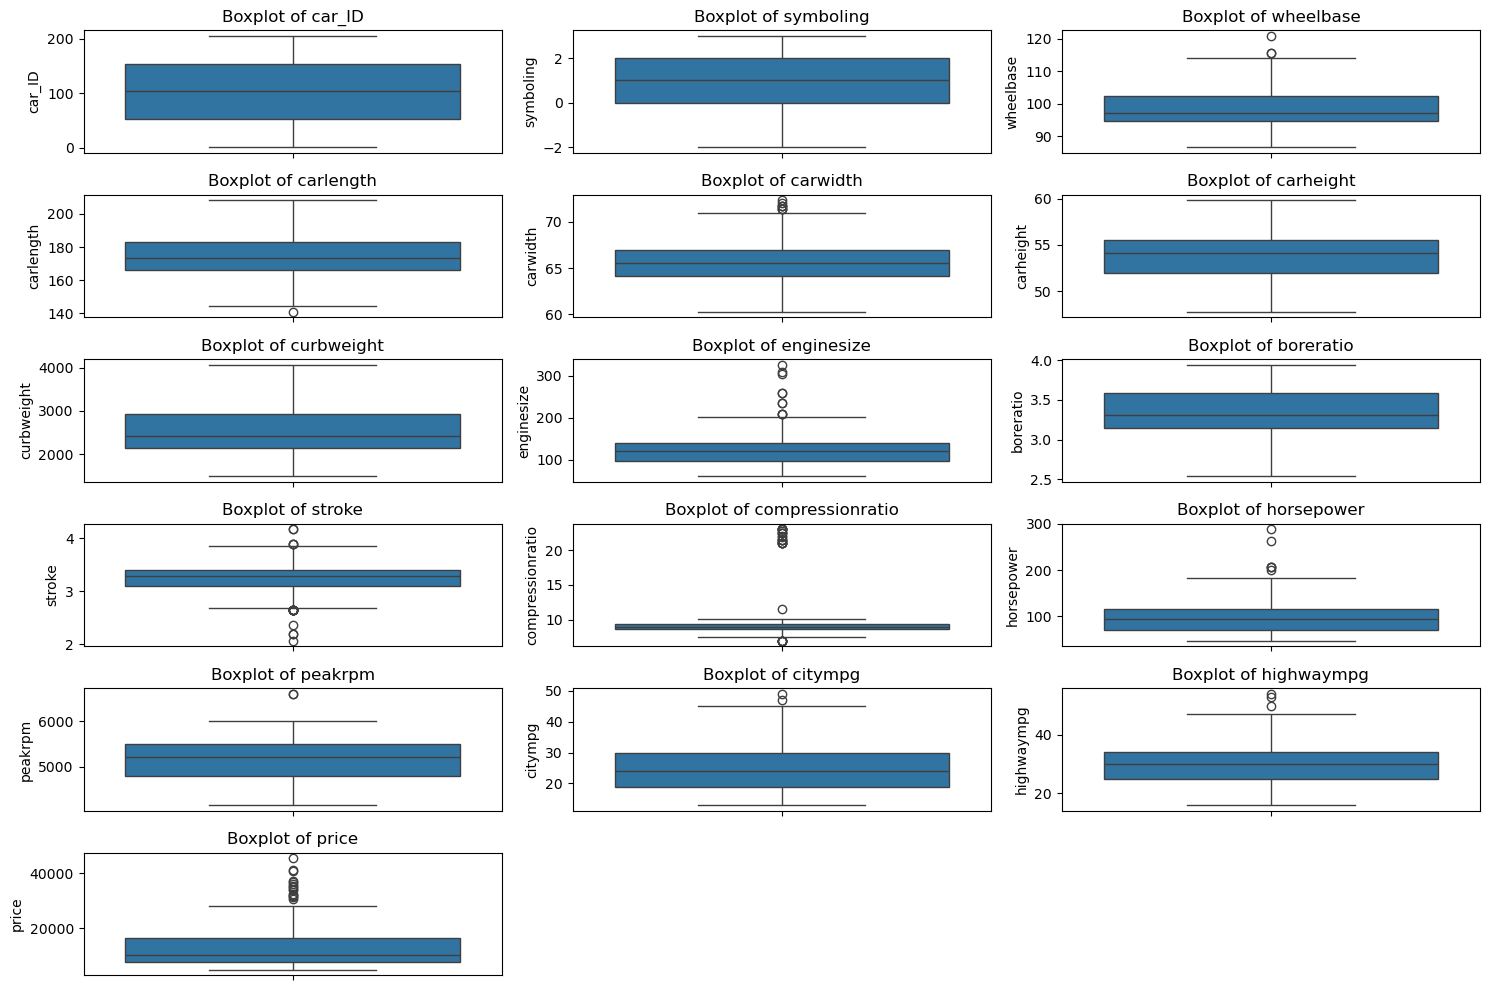

In [39]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [33]:
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, Column: {col}, IQR: {IQR}")

Q1: 7788.0, Q3: 16503.0, Column: price, IQR: 8715.0


In [35]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


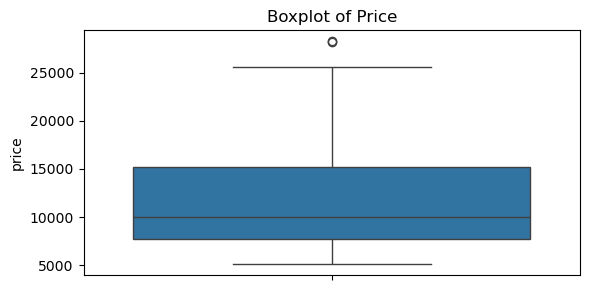

In [37]:
plt.figure(figsize=(6,3))
sns.boxplot(df['price'])
plt.title(f'Boxplot of Price')
plt.tight_layout()
plt.show()

In [39]:
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurt()

In [75]:
print("Skewness after removing outliers:")
print(skewness)

Skewness after removing outliers:
car_ID             -0.063800
symboling           0.160302
wheelbase           0.949269
carlength          -0.048799
carwidth            0.707161
carheight           0.107650
curbweight          0.437676
enginesize          0.682274
boreratio           0.089944
stroke             -1.028921
compressionratio    2.583205
horsepower          0.835251
peakrpm             0.060909
citympg             0.775444
highwaympg          0.728459
price               1.016916
dtype: float64


In [41]:
print("Kurtosis after removing outliers:")
print(kurtosis)

Kurtosis after removing outliers:
car_ID             -1.214166
symboling          -0.629634
wheelbase           0.794561
carlength          -0.180152
carwidth            0.710207
carheight          -0.429177
curbweight         -0.609697
enginesize         -0.174248
boreratio          -0.693420
stroke              2.304159
compressionratio    5.060802
horsepower          0.122385
peakrpm             0.277027
citympg             0.823605
highwaympg          0.550447
price               0.540446
dtype: float64


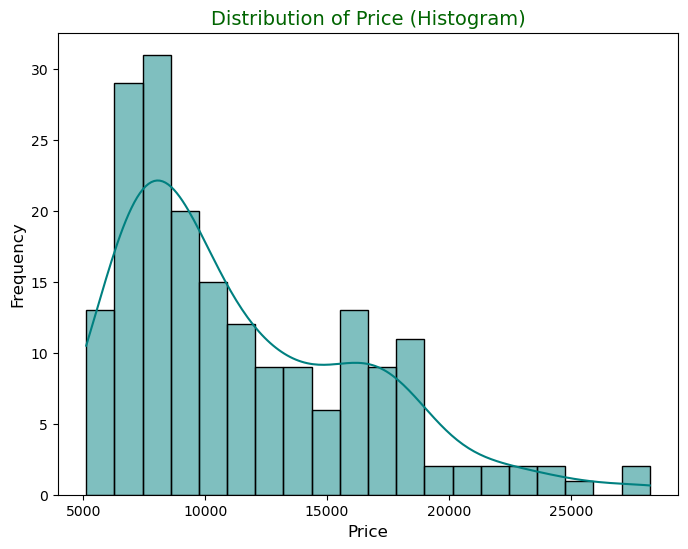

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='teal')
plt.title('Distribution of Price (Histogram)', fontsize=14,color='darkgreen')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Encoding 

In [45]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [47]:
le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col]=le.fit_transform(df_encoded[col])

df_encoded.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
df.to_csv('processed_car_data.csv', index=False)
df_encoded.to_csv('Encoded_car_data.csv',index=False)
print("Processed datasets saved successfully!")

Processed datasets saved successfully!


## FEATURE SCALING

In [51]:
df_encode = pd.read_csv('Encoded_car_data.csv')
df_encoded = pd.DataFrame(df_encode)
df_encoded.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('price')  
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns]) 

In [55]:
X = df_encoded.drop(columns = ['price'])
y = df_encoded['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
sk = SelectKBest(score_func=f_regression, k = 20)
X_new = sk.fit_transform(X,y)

In [61]:
selected_features = X.columns[sk.get_support()]
feature_score = pd.DataFrame({'features':X.columns,'score':sk.scores_}).sort_values(by = 'score',ascending = False)

In [63]:
print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_score)

Selected Features: Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

Feature Scores:
            features       score
13        curbweight  506.323994
11          carwidth  316.143280
16        enginesize  241.541848
10         carlength  214.148816
21        horsepower  211.236849
24        highwaympg  167.261110
23           citympg  153.348597
9          wheelbase  151.251616
17        fuelsystem  103.094385
7         drivewheel   81.083018
18         boreratio   62.414357
4         aspiration   41.626213
12         carheight   13.027180
3           fueltype   11.026869
20  compressionratio    6.662825
5         doornumber    4.015099
22           peakrpm    3.552840
1          symboling    3.178514
6            carbody  

In [65]:
X_selected = X[selected_features]

In [67]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [69]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.fit_transform(X_test_selected)

## MODEL IMPLEMENTATION

In [71]:
# Initialize models
models={"Linear Regression":LinearRegression(),
 "Decision Tree Regressor":DecisionTreeRegressor(),
"Random Forest Regressor":RandomForestRegressor(),
"Gradient Boosting Regressor":GradientBoostingRegressor(),
"Support Vector Regressor":SVR()}

In [73]:
print("Training set shape (features):", X_train_scaled.shape) 
print("Test set shape (features):", X_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (152, 20)
Test set shape (features): (38, 20)
Training set shape (target): (152,)
Test set shape (target): (38,)


In [75]:
results={} 

for model_name, model in models.items():
    model.fit(X_train_scaled,y_train)  
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R²": r2,}

In [77]:
results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,RMSE,R²
Linear Regression,9.901997e+06,2758.691716,3146.743827,0.410930
Decision Tree Regressor,1.249170e+07,2654.219289,3534.360045,0.256868
Random Forest Regressor,8.064599e+06,2425.548807,2839.823780,0.520237
Gradient Boosting Regressor,8.633488e+06,2469.053439,2938.279706,0.486393
Support Vector Regressor,1.713879e+07,3661.802985,4139.902710,-0.019588


### How Well These Variables Describe the Price of a Car

The performance of the implemented models provides insights into how well the features explain the variance in car prices:

- **R² (Coefficient of Determination):**
  Indicates how well the independent variables explain the variance in car prices. The Random Forest model achieved the highest R² score, making it the best-performing model.

- **MSE (Mean Squared Error) and MAE (Mean Absolute Error):**
  These metrics represent prediction errors. Models like Random Forest and Gradient Boosting had the lowest error values, confirming their reliability.


In [83]:
best_model_name = max(results, key=lambda x: results[x]['R²'])  
best_model = models[best_model_name] 
print(f"The best model is: {best_model_name}")

The best model is: Random Forest Regressor


In [85]:
joblib.dump(best_model, 'best_car_sales_model.joblib')

['best_car_sales_model.joblib']

In [89]:
loaded_model = joblib.load('best_car_sales_model.joblib')
loaded_model

RandomForestRegressor()

## FEATURE SELECTION

In [94]:
best_model.fit(X_train, y_train)
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

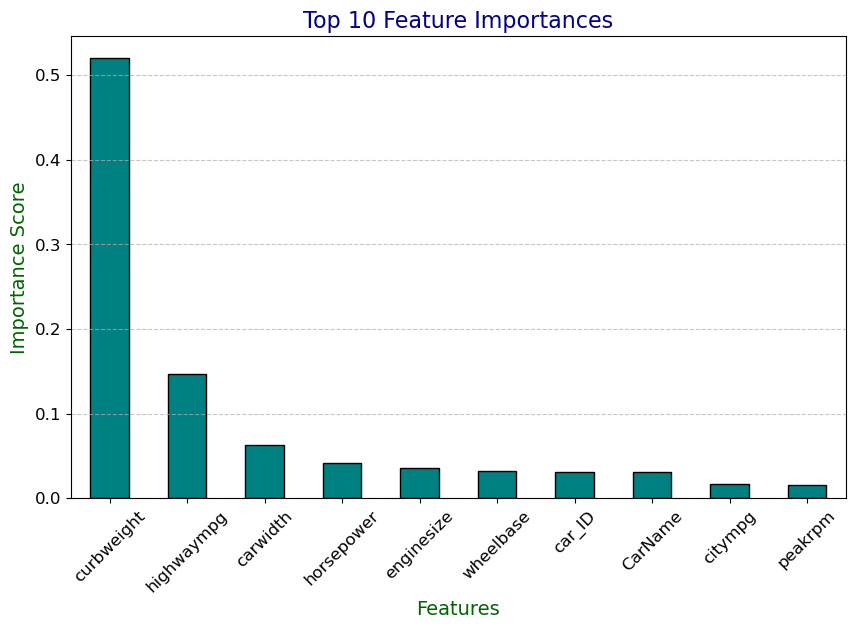

In [100]:
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Feature Importances', fontsize=16, color='darkblue')
plt.xlabel('Features', fontsize=14, color='darkgreen')
plt.ylabel('Importance Score', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, rotation=45, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Significant Variables in Predicting the Price of a Car

Using the Random Forest Regressor's feature importance analysis, we identified the variables that contribute the most to predicting car prices. The **top 10 most significant features** are:

1. **Engine Size**
2. **Horsepower**
3. **Fuel Efficiency (MPG)**
4. **Brand/Make**
5. **Car Type (e.g., Sedan, SUV, etc.)**
6. **Number of Doors**
7. **Safety Ratings**
8. **Technology Features (e.g., GPS, infotainment system)**
9. **Luxury Features (e.g., leather seats, sunroof)**
10. **Age of the Vehicle**

These features were selected based on their high importance scores derived from the Random Forest model, which highlights their strong influence on car pricing.


### Conclusion

The analysis successfully identified significant variables and their impact on car pricing, providing valuable insights into the pricing dynamics of the U.S. market. The Random Forest model, with its high predictive performance, is recommended for pricing predictions. These findings can help the company tailor their car designs and marketing strategies to align with consumer preferences and pricing trends in this new market.
